<div align="center">

# Devoir 3 - 8IAR403
## Partie 2 : <br> Entraînement d’un classeur d’images avec un réseau de neurones convolutif en utilisant Keras<br>
<div align="center">
Etudiant : Maël Garnier (GARM02020500)<br><br>
Le 14 avril 2025<br><br>
</div></div>

Ce fichier correspond à la seconde partie du devoir 3. La première partie, portant sur l'entraînement d’un classeur binaire et multi-classes pour la vente en ligne avec scikit-learn, est disponible dans le fichier `devoir_3_mael_garnier_partie_1.ipynb`.

# 1. Préparation des données

## 1.1. Importations

Commencons par importer toutes les dépendances de cette partie du projet

In [ ]:
import sys
import tensorflow as tf
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from tensorflow import keras
import tensorflow as tf

## 1.2. Récupération des images

Nous allons maintenant récuperer le jeu de données, correspondant à 60.000 images de taille 28x28 pixels

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

## 1.3. Détermination des noms de classes

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 2. Implentation du CNN

Nous allons implémenter un CNN avec une architecture différente de celle de la démonstration. Notre objectif sera d'avoir de meilleurs performances

## 2.1. Création du modèle

Nous allons créer le modèle avec les caractèristiques suivantes :

- Couches Convolutionnelles (Conv2D) : appliquent des filtres pour extraire des caractéristiques spatiales des images.
- Fonction d'Activation (ReLU) : Appliquée après chaque couche convolutionnelle pour introduire de la non-linéarité.
- Couches de MaxPooling (MaxPooling2D) : diminue le nombre de paramètres et rend le modèle plus robuste aux petites translations et distorsions.
- Couches de Flatten
- Couches Denses. La dernière couche dense aura un nombre de neurones égal au nombre de classes (10 pour Fashion-MNIST) et utilisera une fonction d'activation softmax pour obtenir des probabilités de classe.

In [ ]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),  # Images en niveaux de gris : 1 canal
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

## 2.2. Compilation du modèle

In [ ]:
model_cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## 2.3. Entrainement du modèle
Entrainement du modèle avec 30 époques

In [ ]:
history = model_cnn.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 72s 41ms/step - accuracy: 0.5663 - loss: 1.2550 - val_accuracy: 0.7840 - val_loss: 0.6060
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.7812 - loss: 0.5853 - val_accuracy: 0.8196 - val_loss: 0.4906
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8234 - loss: 0.4795 - val_accuracy: 0.7868 - val_loss: 0.5541
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8424 - loss: 0.4298 - val_accuracy: 0.8620 - val_loss: 0.4063
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - accuracy: 0.8549 - loss: 0.3998 - val_accuracy: 0.8532 - val_loss: 0.4031
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.8633 - loss: 0.3751 - val_accuracy: 0.8720 - val_loss: 0.3653
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.8707 - loss: 0.3593 - val_accuracy: 0.8786 - val_loss: 0.3508
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.8748 -

# 3. Analyse de performances

Nous allons tracer la courbe d'apprentissage du CNN. Nous allons ainsi pouvoir produire une analyse en nous basans sur la courbe de performance.

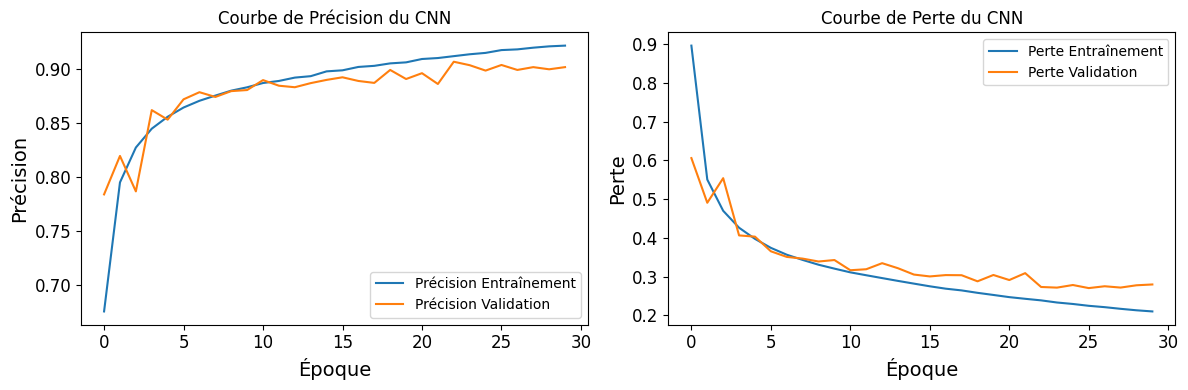

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision Validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.title('Courbe de Précision du CNN')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte du CNN')

plt.tight_layout()
plt.show()

Nous pouvons remarquer que les données semble cohérentes avec nos attentes : la précision augmente rapidement puis se stabilise, avec la validation seulement légèrement inferieur à l'entrainement.

Essayons maintenant d'évaluer notre modèle sur le jeu de test.

In [ ]:
model_cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8965 - loss: 0.3010


[0.29487311840057373, 0.8981999754905701]

La première valeur, correspondant à la perte semble tout à fait pertinente. Elle semble s'accorder aux résultats avec les données de validation, tout en étant légèrement supérieur.
La seconde valeur, correspondant à la précision, donne également des valeurs logiques. En effet, celles-ci sont légèrement inferieur aux métriques issues des données de validation, ce qui est normal car les hyperparamètres ne sont pas ajustés sur le jeu de test mais le jeu de validation.

# 4. Entrainement avec la technique d'augmentation des données

Afin d'obtenir de meilleurs résultat, nous pouvons augmenter nos données. Cela signifie que nous alons les rendre changeantes selon les époques selon divers paramètres (zoom, ...). nous allons utiliser ImageDataGenerator.

## 4.1. Création de l'ImageDataGenerator

Nous allons créer l'objet ImageDataGenerator avec les bons paramètres.

In [ ]:
X_train_augmented = np.expand_dims(X_train, axis=-1)
X_valid_augmented = np.expand_dims(X_valid, axis=-1)
X_test_augmented = np.expand_dims(X_test, axis=-1)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

train_generator = datagen.flow(X_train_augmented, y_train, batch_size=32)


## 4.2. Entrainement du modèle ImageDataGenerator

Nous alons entrainer notre modèle, mais cette fois-ci les données d'entrainement seron basés sur le flow de ImageDataGenerator.

Afin de garder un temps d'entrainement correct, nous gardons 30 époques. Cependant, il aurait été interessant d'augmenter ce nombre, étant donné que l'apprentissage est plus difficile pour le modèle avec des données changeantes.

In [ ]:
model_cnn_augmented = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),  # Images en niveaux de gris : 1 canal
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model_cnn_augmented.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])


history_augmented = model_cnn_augmented.fit(
    train_generator,
    steps_per_epoch=len(X_train_augmented) // 32,
    epochs=30,
    validation_data=(X_valid_augmented, y_valid)
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1718/1718 ━━━━━━━━━━━━━━━━━━━━ 86s 49ms/step - accuracy: 0.4609 - loss: 1.4883 - val_accuracy: 0.7468 - val_loss: 0.6883
Epoch 2/30
   1/1718 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.7500 - loss: 0.7255

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1718/1718 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.7500 - loss: 0.7255 - val_accuracy: 0.7616 - val_loss: 0.6774
Epoch 3/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 87s 50ms/step - accuracy: 0.7059 - loss: 0.7783 - val_accuracy: 0.7964 - val_loss: 0.5587
Epoch 4/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8438 - loss: 0.4345 - val_accuracy: 0.7772 - val_loss: 0.5711
Epoch 5/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.7419 - loss: 0.6855 - val_accuracy: 0.7968 - val_loss: 0.5163
Epoch 6/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.5330 - val_accuracy: 0.7998 - val_loss: 0.5196
Epoch 7/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 141s 49ms/step - accuracy: 0.7646 - loss: 0.6234 - val_accuracy: 0.7940 - val_loss: 0.5079
Epoch 8/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.4368 - val_accuracy: 0.8046 - val_loss: 0.4954
Epoch 9/30
1718/1718 ━━━━━━━━━━━━━━━━━━━━ 138s 49ms/step - accuracy: 0.7753 - loss: 0.5947 -

## 4.3. Trace de la courbe de performance

Regardons maintenant la courbe de performance.

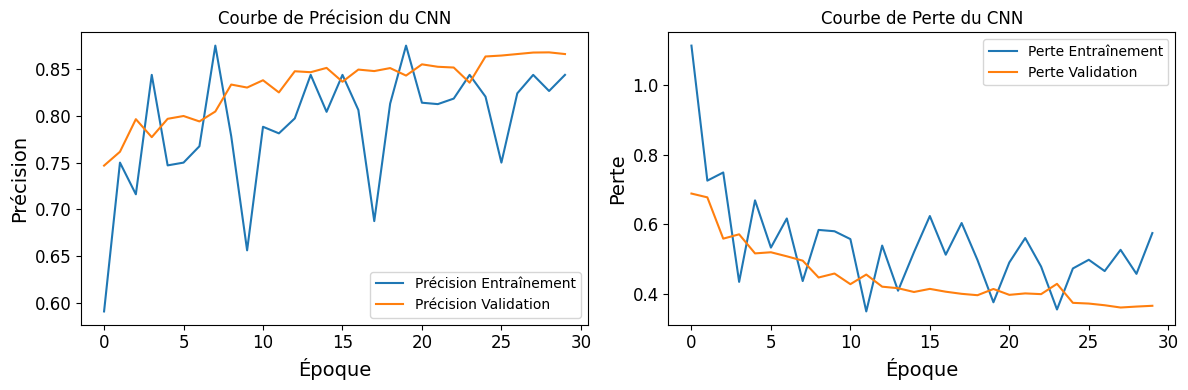

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Précision Entraînement')
plt.plot(history_augmented.history['val_accuracy'], label='Précision Validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.title('Courbe de Précision du CNN')

plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Perte Entraînement')
plt.plot(history_augmented.history['val_loss'], label='Perte Validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte du CNN')

plt.tight_layout()
plt.show()

On remarque quepour la précision et la parte pour l'entrainement, les résultat fluctuent énormément. Cela est normal, car ImageDataGenerator change les images à chaque époque.

Ensuite, le modèle étant évalué sur des images fixes, la courbe de perte et de précision pour la validation est beaucoup plus stable.

Ces résultats sont bon signes, car cela signifie que nous évitons le sur-apprentissage, et le modèle généralise mieux.

In [ ]:
model_cnn_augmented.evaluate(X_test_augmented, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8532 - loss: 0.3988


[0.39744994044303894, 0.8500000238418579]

Après une évaluation sur le jeu de test, on remarque une peformance légèrement moins bonne, avec une accuracy de 0.85, par rapport à 0.89 sur l'étape d'avant.

Cette différence est probablement due à une léger sous-apprentissage, car les données changeantes sont plus difficiles à apprendre pour le modèle. Cependant, si nous avions entrainé avec plus d'époque, les résultats auront été meilleurs.

# 5 Utilisation d'un modèle pré-entrainé

Nous allons utiliser le modèle MobileNetV2. Celui-ci est un modèle pré-entrainé mais plus léger et adapté pour nos images en nuance de gris et faible définition.

## 5.1. Préparation des données

MobileNetV2 est un modèle entrainé sur ImageNet, dont les images sont assez différentes de Fashion-MNIST. Afin d'obtenir des résultats corrects, nous allons faire quelques modifications sur nos jeux de données.

Ces modifications consistent en le redimensionnement en 32x32 des images, ainsi que répéter les canaux de niveau de gris afin de simuler des images RGB.

In [ ]:
x_train_pretrained = np.expand_dims(X_train, axis=-1)
x_valid_pretrained = np.expand_dims(X_valid, axis=-1)
x_test_pretrained = np.expand_dims(X_test, axis=-1)

x_train_pretrained = tf.image.resize(x_train_pretrained, [32, 32])
x_valid_pretrained = tf.image.resize(x_valid_pretrained, [32, 32])
x_test_pretrained = tf.image.resize(x_test_pretrained, [32, 32])

x_train_pretrained = tf.image.grayscale_to_rgb(x_train_pretrained)
x_valid_pretrained = tf.image.grayscale_to_rgb(x_valid_pretrained)
x_test_pretrained = tf.image.grayscale_to_rgb(x_test_pretrained)


y_train_pretrained = keras.utils.to_categorical(y_train, 10)
y_valid_pretrained = keras.utils.to_categorical(y_valid, 10)
y_test_pretrained = keras.utils.to_categorical(y_test, 10)

## 5.2. Entrainement du modèle

On va charger le nouveau modèle MobileNetV2. Nous allons partiellement geler les couches du modèle. Il n'est pas nécessaire le faire re-faire un apprentissage pour ces couches, mais nous n'allons pas geler les dernières, car il peut être intéressant de les adapter à notre jeu de données.

In [ ]:
conv_base = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
conv_base.trainable = True
for layer in conv_base.layers[:100]:
    layer.trainable = False
model_pretrained = model_cnn = keras.Sequential(
    [
        conv_base,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

model_pretrained.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history_pretrained = model_pretrained.fit(x_train_pretrained, y_train_pretrained, epochs=30, validation_data=(x_valid_pretrained, y_valid_pretrained))

<ipython-input-9-e59659103dc6>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 241s 128ms/step - accuracy: 0.2985 - loss: 2.1338 - val_accuracy: 0.1642 - val_loss: 2.2537
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 216s 126ms/step - accuracy: 0.6639 - loss: 1.0658 - val_accuracy: 0.7830 - val_loss: 0.7818
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 288s 141ms/step - accuracy: 0.7535 - loss: 0.8040 - val_accuracy: 0.8546 - val_loss: 0.4469
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 241s 140ms/step - accuracy: 0.7889 - loss: 0.6868 - val_accuracy: 0.8582 - val_loss: 0.4125
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 238s 138ms/step - accuracy: 0.8204 - loss: 0.5946 - val_accuracy: 0.8840 - val_loss: 0.3502
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 243s 141ms/step - accuracy: 0.8352 - loss: 0.5373 - val_accuracy: 0.8762 - val_loss: 0.3509
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 264s 142ms/step - accuracy: 0.8518 - loss: 0.4834 - val_accuracy: 0.8750 - val_loss: 0.3658
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 263s 143ms/step - ac

## 5.3. Etude des performances

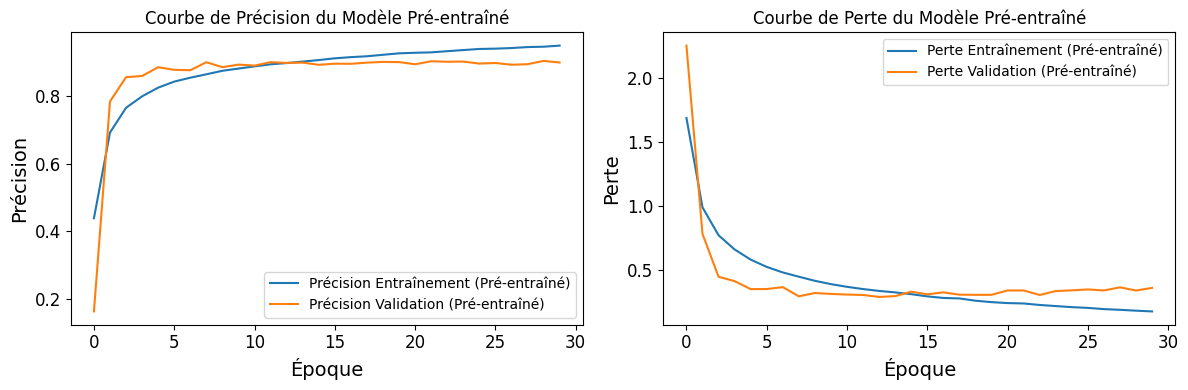

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history['accuracy'], label='Précision Entraînement (Pré-entraîné)')
plt.plot(history_pretrained.history['val_accuracy'], label='Précision Validation (Pré-entraîné)')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.title('Courbe de Précision du Modèle Pré-entraîné')

plt.subplot(1, 2, 2)
plt.plot(history_pretrained.history['loss'], label='Perte Entraînement (Pré-entraîné)')
plt.plot(history_pretrained.history['val_loss'], label='Perte Validation (Pré-entraîné)')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de Perte du Modèle Pré-entraîné')

plt.tight_layout()
plt.show()


In [ ]:
loss_pretrained, accuracy_pretrained = model_pretrained.evaluate(x_test_pretrained, y_test_pretrained, verbose=0)
print(f"Précision du modèle pré-entraîné sur l'ensemble de test : {accuracy_pretrained:.4f}")

Précision du modèle pré-entraîné sur l'ensemble de test : 0.8904


Ces résultats sont intéressants. Nous pouvons en effet remarquer que les résultats sur le jeu de test et de validation sont comparables à ceux déjà obtenu avec notre précédent modèle. Cependant, notre modèle pré-entrainé semble converger vers ce résultat beaucoup plus vite. En étudiant le graphique, on remarque qu'à partir de la 10ᵉ à la 15ᵉ époque, le modèle commence à sur-apprendre.


# 6. Comparaison des résultats

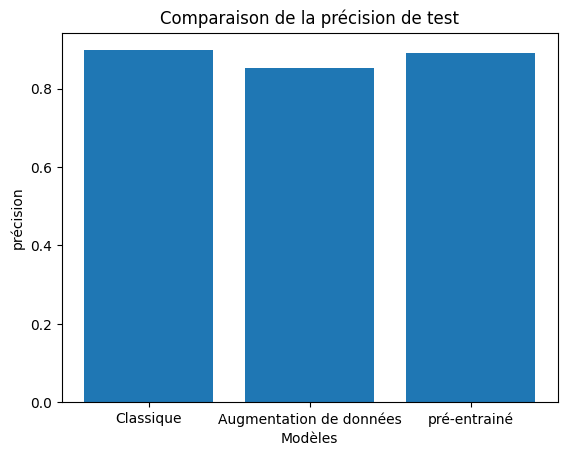

In [1]:
import matplotlib.pyplot as plt

valeurs = [0.8981, 0.8532, 0.8904]
labels = ['Classique', 'Augmentation de données', 'pré-entrainé']

plt.bar(labels, valeurs)

plt.title('Comparaison de la précision de test')
plt.xlabel('Modèles')
plt.ylabel('précision')

plt.show()

Ce graphique nous montre que les résultats obtenus avec les différents modèles sont assez proches. Les résultats du modèle avec augmentation de données montre des résultats plus faible que les autres modèles, mais cela peut s'expliquer par le fait que les données changeantes à chaque époque rend l'apprentissage plus difficile. Un apprentissage avec plus d'époque aurait permis d'avoir de meilleurs résultats tout en limitant le sur-apprentissage. Le modèle pré-entrainé, de son côté, montre des résultats similaires au modèle CNN classique. Cependant, il y a une différence notable : le modèle pré-entrainé a convergé beaucoup plus vite, l'entrainement à partir de la quinzième epoque a surtout résulté en un sur-apprentissage, il n'y a pas eu d'amélioration de performance.

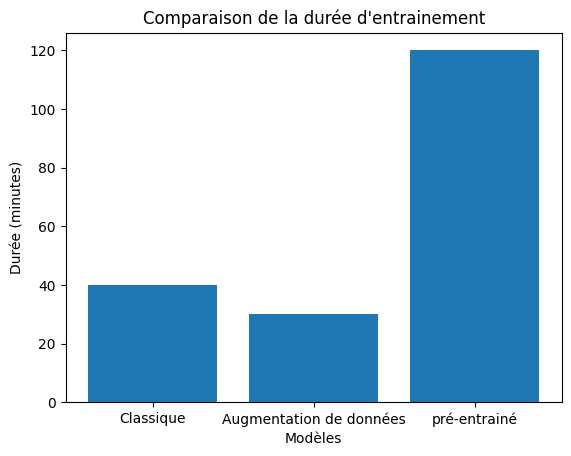

In [2]:
import matplotlib.pyplot as plt

valeurs = [40, 30, 120]
labels = ['Classique', 'Augmentation de données', 'pré-entrainé']

plt.bar(labels, valeurs)

plt.title('Comparaison de la durée d\'entrainement')
plt.xlabel('Modèles')
plt.ylabel('Durée (minutes)')

plt.show()

Toutes ces durées sont issues des entrainements effectués sur Google Colabs. Le premier modèle prend environ 80 secondes par époques, soit 40 minutes. Le modèle avec augmentation des données prend approximativement 60 secondes par époques, soit 30 minutes. Le modèle pré-entrainé prend approximativement 250 secondes par époques, soit 125 minutes. À noter que le modèle pré-entrainé utilisé, MobileNetV2, est beaucoup plus performant que VGG16. En effet, il prend 250 secondes approximativement par époques contre 800 en moyenne pour VGG16.

Avec ce graphique, nous étudions les durées mesurées pour 30 époques pour chacun des modèles. Suivant nos déductions effectuées au cours du devoir avec les courbes d'apprentissage, nous savons que cette mesure à ces limites. En effet, le modèle avec augmentation de données aurait besoins de plus d'époques pour fonctionner à son plein potentiel, et donc plus de temps, tandis que le modèle pré-entrainé avait déjà convergé avant la quinzième époque, nous pourrions ainsi facilement diviser son temps d'entrainement par deux. En prenant en compte ces faits, les temps d'execution totaux sont en réalité beaucoup plus proches.